# Module: Linear and Generalized Linear Models in Machine Learning

Welcome to this module on linear and generalized linear models! In this notebook, you will explore the foundational concepts and practical applications of linear regression, regularization techniques, linear classification algorithms, and model evaluation using ROC and PR curves. These methods are essential for understanding how machine learning models make predictions and how to interpret their results. By the end of this module, you will have a strong grasp of both the theory and practice of these core techniques.


# Topics Covered

1. Linear Regression
2. Ridge Regression
3. Lasso Paths
4. Linear Classification Algorithms
5. Logistic Regression
6. Criterion for Optimality
7. Visualization in Matplotlib: ROC and PR Curves

---

# Linear Regression

## Objectives
- Explain the concept and intuition behind linear regression
- Identify real-world applications of linear regression
- Understand the assumptions and limitations of linear regression

## Introduction
Linear regression is a foundational technique in statistics and machine learning for modeling the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to fit a straight line (in simple linear regression) or a hyperplane (in multiple regression) that best predicts the target variable from the features. It is widely used for tasks such as predicting house prices, sales forecasting, and risk assessment.

Linear regression assumes a linear relationship between the variables, meaning the change in the target variable is proportional to the change in the feature(s). The model estimates coefficients for each feature to minimize the difference between the predicted and actual values, typically using the least squares method.

## Key Points
- Linear regression finds the best-fitting line by minimizing the sum of squared errors between predictions and actual values.
- It can be used for both simple (one feature) and multiple (many features) regression problems.
- Assumptions include linearity, independence of errors, homoscedasticity (constant variance of errors), and normality of error terms.
- Outliers and non-linear relationships can negatively impact model performance.
- Linear regression models the relationship between a dependent variable $y$ and one or more independent variables $x$.
- The model assumes a linear relationship: $y = \mathbf{w}^T \mathbf{x} + b$.
- The parameters $\mathbf{w}$ and $b$ are estimated by minimizing the mean squared error (MSE):

$$
\min_{\mathbf{w}, b} \frac{1}{n} \sum_{i=1}^n (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2
$$




# Linear Regression Example: Predicting MLB Player Weight from Height and Age

In this example, we use the `mlb.txt` dataset to demonstrate linear regression. We will predict a player's weight based on their height and age. The process includes data loading, preprocessing, model training, evaluation, and visualization.

C:\Users\DELL\AppData\Local\Temp\ipykernel_16920\1809874856.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/mlb.txt', delim_whitespace=True, quotechar='"')


,Name,Team,Position,Height,Weight,Age,PosCategory
1,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
2,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
3,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
4,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
5,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


Mean Squared Error: 303.07
R^2 Score: 0.25


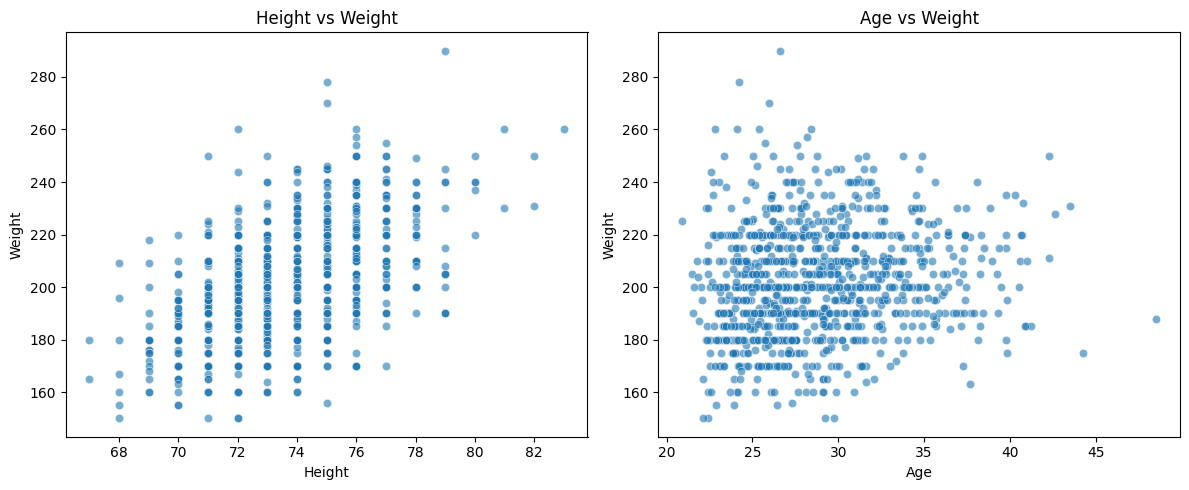

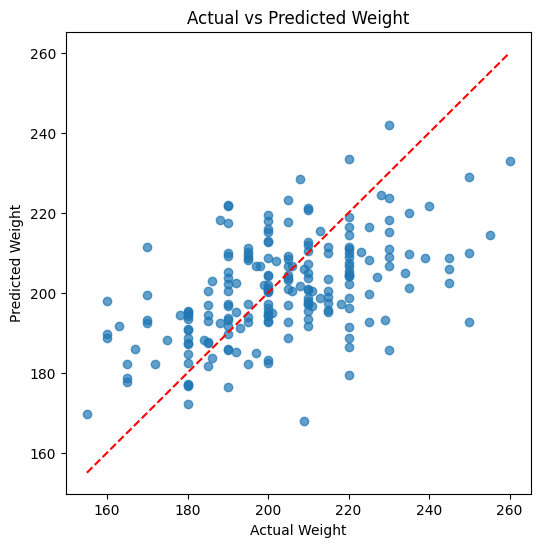

Model coefficients:
  Height: 5.04
  Age: 1.05
Intercept: -200.84


In [8]:
# This example demonstrates how to use linear regression to predict a player's weight
# based on their height and age using the mlb.txt dataset.
# The workflow includes data loading, preprocessing, model training, evaluation, and visualization.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (note: separator is whitespace or tab, and quotes are used)
df = pd.read_csv('data/mlb.txt', delim_whitespace=True, quotechar='"')

# Display the first few rows
display(df.head())

# Select features and target
# We'll use Height and Age to predict Weight
X = df[["Height", "Age"]]
y = df["Weight"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualize the relationship between Height, Age, and Weight
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x="Height", y="Weight", data=df, alpha=0.6)
plt.title("Height vs Weight")
plt.subplot(1,2,2)
sns.scatterplot(x="Age", y="Weight", data=df, alpha=0.6)
plt.title("Age vs Weight")
plt.tight_layout()
plt.show()

# Visualize predicted vs actual weights
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Show model coefficients
print("Model coefficients:")
for name, coef in zip(["Height", "Age"], model.coef_):
    print(f"  {name}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# The model can now be used to predict the weight of a player given their height and age.

## Explanatory Notes: Linear Regression Example

- **Goal:** Predict MLB player weight using height and age as predictors.
- **Data Preparation:**
  - The dataset is loaded and relevant columns (Height, Age, Weight) are selected.
  - Data is split into training and test sets to evaluate model generalization.
- **Model Training:**
  - A linear regression model is fit to the training data.
  - The model learns coefficients for Height and Age to best predict Weight.
- **Evaluation:**
  - Model performance is measured using Mean Squared Error (MSE) and R² score.
  - Visualizations show the relationships between features and target, and compare predicted vs actual weights.
- **Interpretation:**
  - The coefficients indicate how much weight is expected to change with a unit change in height or age, holding the other variable constant.
  - The model can be used to estimate a player's weight given their height and age.
- **Limitations:**
  - Linear regression assumes a linear relationship and may not capture complex patterns.
  - Other features (e.g., position, team) could be included for more advanced modeling.

This example demonstrates a typical workflow for regression analysis in Python using pandas, scikit-learn, and matplotlib/seaborn for visualization.

## Summary
Linear regression is a simple yet powerful tool for understanding and predicting relationships between variables. It is easy to interpret and implement but requires careful attention to its assumptions.

## Review and Self-Assessment
- What are the main assumptions of linear regression?
- Give two real-world examples where linear regression can be applied.
- What is the least squares method?

---

# Ridge Regression

## Objectives
- Describe the purpose of ridge regression and regularization
- Understand how ridge regression addresses overfitting
- Recognize when to use ridge regression in practice

## Introduction
Ridge regression is an extension of linear regression that adds a regularization term (L2 penalty) to the loss function. This penalty discourages large coefficients, making the model less sensitive to noise and multicollinearity (when features are highly correlated). Regularization helps prevent overfitting, especially when the number of features is large compared to the number of observations.

The strength of the penalty is controlled by a parameter (often called alpha or lambda). As the penalty increases, the coefficients shrink toward zero, but unlike lasso regression, they never become exactly zero.

## Key Points
- Ridge regression adds an L2 penalty to the loss function, shrinking coefficients but not eliminating them.
- It is especially useful when features are correlated or when there are more features than samples.
- The regularization parameter controls the trade-off between fitting the data and keeping coefficients small.
- Ridge regression adds $\ell_2$ regularization to linear regression to prevent overfitting.
- The optimization problem is:

$$
\min_{\mathbf{w}, b} \left[ \frac{1}{2n} \sum_{i=1}^n (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 + \alpha \|\mathbf{w}\|_2^2 \right]
$$
- $\alpha$ controls the strength of regularization.


# Ridge Regression Example: Predicting MLB Player Weight from Height and Age

In this example, we use the `mlb.txt` dataset to demonstrate Ridge regression. We will predict a player's weight based on their height and age. The process includes data loading, preprocessing, model training, evaluation, and visualization.

Test MSE: 299.05
Test R^2: 0.257
Cross-validated R^2 scores: [0.38216985 0.28042615 0.31819929 0.29373361 0.30998783]
Mean CV R^2: 0.317


C:\Users\DELL\AppData\Local\Temp\ipykernel_16920\3440206637.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mlb = pd.read_csv('data/mlb.txt', delim_whitespace=True, quotechar='"', skipinitialspace=True)


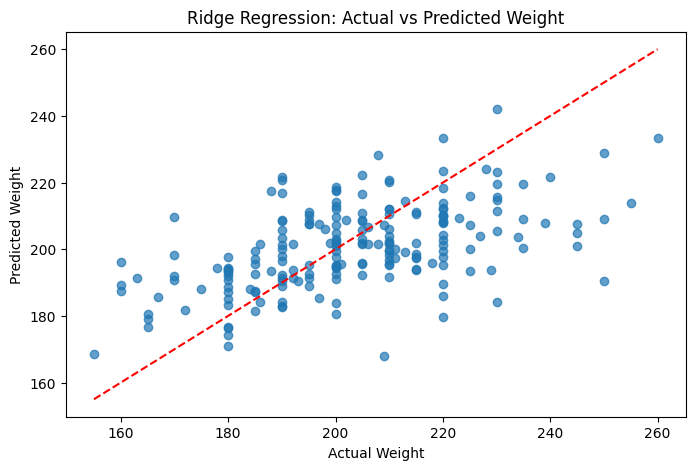

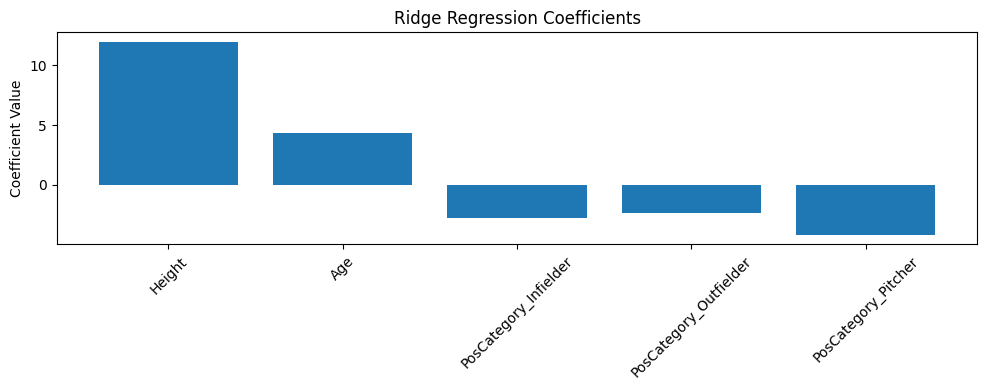

In [9]:
# Ridge Regression Example with MLB Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the MLB dataset
mlb = pd.read_csv('data/mlb.txt', delim_whitespace=True, quotechar='"', skipinitialspace=True)

# 2. Clean and prepare the data
# Drop rows with missing values (if any)
mlb = mlb.dropna(subset=['Height', 'Weight', 'Age', 'PosCategory'])

# Select features and target
X = mlb[['Height', 'Age', 'PosCategory']]
y = mlb['Weight']

# One-hot encode the categorical feature (PosCategory)
X_encoded = pd.get_dummies(X, columns=['PosCategory'], drop_first=True)

# 3. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Feature scaling (important for Ridge regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Fit Ridge Regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train_scaled, y_train)

# 6. Predict and evaluate
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.3f}")

# 7. Cross-validation for more robust evaluation
cv_scores = cross_val_score(ridge, scaler.transform(X_encoded), y, cv=5, scoring='r2')
print(f"Cross-validated R^2 scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean():.3f}")

# 8. Visualize predictions vs. actual weights
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Ridge Regression: Actual vs Predicted Weight')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# 9. Visualize feature coefficients
coefs = ridge.coef_
feature_names = X_encoded.columns
plt.figure(figsize=(10, 4))
plt.bar(feature_names, coefs)
plt.xticks(rotation=45)
plt.title('Ridge Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


### Ridge Regression Example Explanation

- **Goal:** Predict MLB player weight using height, age, and position category as features.
- **Data Preparation:**
  - The dataset is loaded and cleaned, with categorical features one-hot encoded.
  - Data is split into training and test sets, and features are scaled for regularization.
- **Model:**
  - Ridge regression is used to prevent overfitting by adding L2 regularization.
  - The model is trained on the training set and evaluated on the test set.
- **Evaluation:**
  - Performance is measured using Mean Squared Error (MSE) and R² score.
  - Cross-validation provides a more robust estimate of model performance.
- **Visualization:**
  - A scatter plot compares actual and predicted weights.
  - A bar plot shows the learned coefficients for each feature, indicating their influence on the prediction.

This workflow demonstrates how to use Ridge regression for regression tasks, including preprocessing, model fitting, evaluation, and interpretation.

## Summary
Ridge regression improves the generalization of linear models by penalizing large coefficients, making it robust to multicollinearity and overfitting.

## Review and Self-Assessment
- What problem does ridge regression solve that standard linear regression does not?
- How does the regularization parameter affect the model?
- When would you prefer ridge regression over lasso regression?


---

# Lasso Paths

## Objectives
- Explain the concept of lasso regression and feature selection
- Understand how lasso paths visualize coefficient changes
- Identify scenarios where lasso regression is beneficial

## Introduction
Lasso regression is a regularization technique that adds an L1 penalty to the loss function. Unlike ridge regression, lasso can shrink some coefficients exactly to zero, effectively performing feature selection. This makes lasso especially useful when you suspect that only a subset of features are important for predicting the target variable.

Lasso paths are visualizations that show how the coefficients of each feature change as the regularization parameter varies. These plots help you understand which features remain important as the penalty increases.

## Key Points
- Lasso regression can set some coefficients to zero, removing irrelevant features from the model.
- Lasso paths help visualize the effect of regularization on each feature.
- Useful for high-dimensional data where feature selection is important.
- Lasso regression adds $\ell_1$ regularization to linear regression, encouraging sparsity in the coefficients.
- The optimization problem is:

$$
\min_{\mathbf{w}, b} \left[ \frac{1}{2n} \sum_{i=1}^n (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2 + \alpha \|\mathbf{w}\|_1 \right]
$$




## Lasso Path Example with Soil Spectral Dataset

In this example, we use the `training.csv` dataset, which contains soil samples with hundreds of spectral measurements (at different wavelengths), environmental features, and soil property targets (such as Calcium, Phosphorus, pH, SOC, and Sand). We will demonstrate how to use Lasso regression to analyze the relationship between the spectral/environmental features and a target soil property. Specifically, we will plot the Lasso coefficient paths to visualize how feature selection evolves as the regularization strength changes.

Lasso regression is useful for high-dimensional data like this, as it can perform both regularization and feature selection by driving some coefficients to zero. This helps us identify which wavelengths or features are most predictive of the soil property of interest.

d:\Work\EDA_Complete\EDA_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e-01, tolerance: 1.325e-01
  model = cd_fast.enet_coordinate_descent(
d:\Work\EDA_Complete\EDA_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e-01, tolerance: 1.325e-01
  model = cd_fast.enet_coordinate_descent(
d:\Work\EDA_Complete\EDA_venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.47

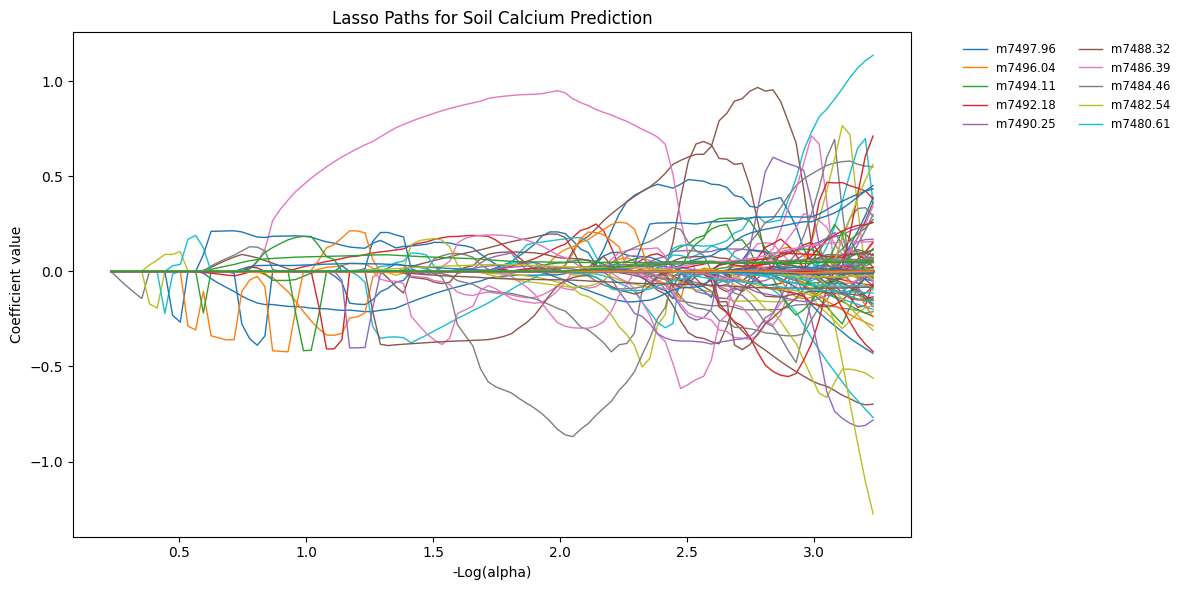

Most important features selected by Lasso: ['m7185.55', 'm5247.42', 'm4541.59', 'm4539.66', 'm4537.73', 'm4535.81', 'm4520.38', 'm3855.05', 'm3712.34', 'm3689.2', 'm3675.7', 'm3627.49', 'm3625.56', 'm3596.63', 'm3453.92', 'm3297.72', 'm3126.08', 'm3116.44', 'm3114.51', 'm2917.8', 'm2680.6', 'm2678.67', 'm2674.81', 'm2505.11', 'm2503.18', 'm2501.25', 'm2499.32', 'm2497.39', 'm2495.46', 'm2493.54', 'm2491.61', 'm2429.9', 'm2427.97', 'm2426.04', 'm2424.11', 'm2422.18', 'm2420.25', 'm2360.47', 'm2213.91', 'm2211.98', 'm2210.05', 'm2208.12', 'm2206.19', 'm2204.26', 'm2202.33', 'm2200.41', 'm1839.78', 'm1837.85', 'm1803.14', 'm1785.78', 'm1693.21', 'm1610.29', 'm1608.36', 'm1556.29', 'm1537.01', 'm1494.58', 'm1450.22', 'm1448.3', 'm1429.01', 'm1427.08', 'm1407.8', 'm1334.51', 'm1303.66', 'm1247.73', 'm1211.09', 'm1106.95', 'm1066.45', 'm1064.53', 'm1047.17', 'm1020.17', 'm977.744', 'm975.815', 'm912.175', 'm877.462', 'm867.82', 'm848.535', 'm777.181', 'm713.541', 'm694.256', 'm673.043', 'm67

In [10]:
# Lasso path example on soil spectral dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import lasso_path

# Load the dataset (adjust the path if needed)
df = pd.read_csv('data/training.csv')

# Select features: all spectral columns (start with 'm') and environmental features
spectral_cols = [col for col in df.columns if col.startswith('m')]
env_cols = ['BSAN', 'BSAS', 'BSAV', 'CTI', 'ELEV', 'EVI', 'LSTD', 'LSTN', 'REF1', 'REF2', 'REF3', 'REF7', 'RELI', 'TMAP', 'TMFI']
features = spectral_cols + env_cols

# Drop rows with missing values in selected columns
df = df.dropna(subset=features + ['Ca'])

X = df[features].values
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Target: Calcium (Ca)
y = df['Ca'].values

# Compute Lasso path
alphas_lasso, coefs_lasso, _ = lasso_path(X_scaled, y, alphas=None, max_iter=10000)

# Plot the coefficient paths
plt.figure(figsize=(12, 6))
for i in range(coefs_lasso.shape[0]):
    plt.plot(-np.log10(alphas_lasso), coefs_lasso[i], label=features[i] if i < 10 else None, lw=1)
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficient value')
plt.title('Lasso Paths for Soil Calcium Prediction')
plt.legend(loc='best', fontsize='small', ncol=2, frameon=False, bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Show which features are most important at lowest alpha
important_features = [features[i] for i, c in enumerate(coefs_lasso[:, -1]) if abs(c) > 1e-3]
print('Most important features selected by Lasso:', important_features)

### Explanation of the Lasso Path Example

In this example, we used Lasso regression to analyze the relationship between hundreds of spectral/environmental features and the soil Calcium (Ca) content. The Lasso path plot shows how the coefficients of each feature evolve as the regularization parameter (alpha) changes. As alpha decreases (moving right on the x-axis), more features enter the model, but only a few remain important at low regularization.

Lasso is particularly useful for high-dimensional data because it can shrink many coefficients to zero, effectively performing feature selection. The plot helps us visualize which wavelengths or environmental features are most predictive of soil Ca. The printed list shows the most important features selected by Lasso at the lowest alpha value, highlighting the key predictors for this soil property.

This approach can be repeated for other soil properties (e.g., P, pH, SOC, Sand) by changing the target variable.

## Summary
Lasso regression is a powerful tool for both regularization and automatic feature selection, helping to build simpler and more interpretable models.

## Review and Self-Assessment
- How does lasso regression perform feature selection?
- What information do lasso paths provide?
- When is lasso preferred over ridge regression?

---

# Linear Classification Algorithms

## Objectives
- Define linear classification and its applications
- List common linear classification algorithms
- Understand the advantages and limitations of linear classifiers

## Introduction
Linear classification algorithms are used to separate data into classes using a linear decision boundary. These algorithms are efficient and interpretable, making them popular for many real-world applications such as spam detection, medical diagnosis, and text classification. Examples include logistic regression, linear discriminant analysis (LDA), and support vector machines (SVMs) with linear kernels.

Linear classifiers work well when the classes are linearly separable, but may struggle with complex, non-linear relationships. They are often used as a baseline before trying more complex models.

## Key Points
- Linear classifiers use a linear function to separate classes.
- They are computationally efficient and easy to interpret.
- Common algorithms: logistic regression, LDA, linear SVM.
- May not perform well if the data is not linearly separable.

## Summary
Linear classification algorithms are fast, interpretable, and effective for many problems, especially when the relationship between features and classes is approximately linear.

## Review and Self-Assessment
- Name three linear classification algorithms.
- What are the strengths and weaknesses of linear classifiers?
- In what situations would you avoid using a linear classifier?


---

# Logistic Regression

## Objectives
- Describe the purpose and intuition behind logistic regression
- Understand how logistic regression models probabilities
- Recognize its use in binary and multiclass classification

## Introduction
Logistic regression is a linear model used for classification tasks. It estimates the probability that a given input belongs to a particular class using the logistic (sigmoid) function. The output is a value between 0 and 1, which can be interpreted as a probability. Logistic regression is widely used for binary classification (e.g., spam vs. not spam) and can be extended to multiclass problems using techniques like one-vs-rest.

The model is trained by maximizing the likelihood of the observed data, or equivalently, by minimizing the cross-entropy loss.

## Key Points
- Logistic regression outputs probabilities, not just class labels.
- Uses the sigmoid function to map predictions to the [0, 1] interval.
- Can be extended to multiclass classification.
- Assumes a linear relationship between features and the log-odds of the outcome.
- The model is:

$$
p = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \mathbf{x} + b)}}
$$
- The loss function is the binary cross-entropy (log loss):

$$
L = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log(p_i) + (1-y_i)\log(1-p_i) \right]
$$



## Logistic Regression Example with Fall Detection Dataset

In this example, we use the `falldetection.csv` dataset, which contains physiological and activity data for fall detection. The dataset includes features such as EEG, blood pressure (BP), heart rate (HR), and circulation, along with an activity label. We will demonstrate how to use logistic regression to classify whether a given record corresponds to a fall or not, and visualize the results.

Logistic regression is a simple yet effective classification algorithm, especially useful for binary classification tasks like fall detection.

              precision    recall  f1-score   support

     No Fall       0.97      1.00      0.98      4764
        Fall       0.00      0.00      0.00       151

    accuracy                           0.97      4915
   macro avg       0.48      0.50      0.49      4915
weighted avg       0.94      0.97      0.95      4915



d:\Work\EDA_Complete\EDA_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Work\EDA_Complete\EDA_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Work\EDA_Complete\EDA_venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


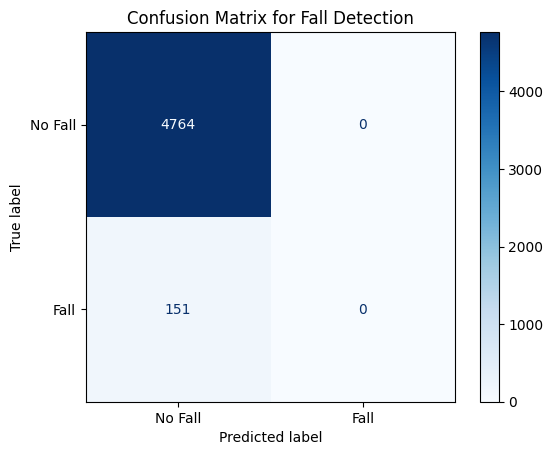

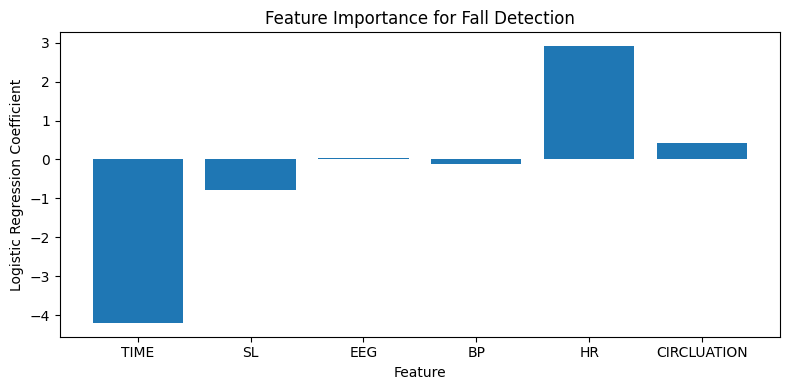

In [11]:
# Logistic regression for fall detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df_fall = pd.read_csv('data/falldetection.csv')

# For binary classification: define 'fall' as ACTIVITY == 1 (example, adjust as needed)
df_fall['is_fall'] = (df_fall['ACTIVITY'] == 1).astype(int)

# Select features and target
feature_cols = ['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']
X = df_fall[feature_cols].values
y = df_fall['is_fall'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=['No Fall', 'Fall']))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fall', 'Fall'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fall Detection')
plt.show()

# Visualize feature importance
plt.figure(figsize=(8,4))
plt.bar(feature_cols, logreg.coef_[0])
plt.xlabel('Feature')
plt.ylabel('Logistic Regression Coefficient')
plt.title('Feature Importance for Fall Detection')
plt.tight_layout()
plt.show()

### Explanation of the Logistic Regression Fall Detection Example

In this example, we used logistic regression to classify whether a record in the fall detection dataset corresponds to a fall event. The model was trained on physiological and activity features, and its performance was evaluated using a confusion matrix and classification report.

- The confusion matrix visualizes the number of correct and incorrect predictions for each class (fall vs. no fall).
- The feature importance plot shows which physiological features contribute most to the model's decision.
- Logistic regression is a good baseline for binary classification and provides interpretable coefficients for each feature.

This approach can be extended to multiclass activity recognition or improved with more advanced models if needed.

## Summary
Logistic regression is a foundational classification algorithm that is easy to interpret and implement, making it a common first choice for classification tasks.

## Review and Self-Assessment
- How does logistic regression differ from linear regression?
- What is the role of the sigmoid function?
- How can logistic regression be adapted for multiclass problems?

---

# Criterion for Optimality

## Objectives
- Define the criterion for optimality in optimization
- Understand its importance in machine learning
- Recognize examples of optimality criteria

## Introduction
The criterion for optimality specifies the conditions under which a solution to an optimization problem is considered optimal. In machine learning, this often means finding the model parameters that minimize a loss function (such as mean squared error for regression or cross-entropy for classification). A common optimality criterion is that the gradient of the loss function with respect to the parameters is zero (a stationary point).

Optimality criteria are essential for guiding the training process and ensuring that the model achieves the best possible performance on the training data.

## Key Points
- Provides a stopping condition for optimization algorithms.
- Common criteria: zero gradient, minimum loss, or maximum likelihood.
- Ensures that the model parameters are as close as possible to the best solution.
- For example, in regression, the optimality criterion is often minimizing the mean squared error (MSE):

$$
\min_{\mathbf{w}, b} \frac{1}{n} \sum_{i=1}^n (y_i - (\mathbf{w}^T \mathbf{x}_i + b))^2
$$



---

# Visualization in Matplotlib: ROC and PR Curves

## Objectives
- Explain the purpose of ROC and PR curves
- Learn how to interpret these curves for model evaluation
- Understand when to use ROC vs. PR curves

## Introduction
ROC (Receiver Operating Characteristic) and PR (Precision-Recall) curves are essential tools for evaluating the performance of classification models, especially in imbalanced datasets. The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. The area under the ROC curve (AUC) provides a single measure of overall model performance.

The PR curve plots precision (positive predictive value) against recall (sensitivity). PR curves are particularly informative when dealing with imbalanced datasets, as they focus on the performance with respect to the positive class.

## Key Points
- ROC curves show the trade-off between sensitivity and specificity.
- PR curves are more informative for imbalanced datasets.
- Both curves help in selecting optimal classification thresholds.
- The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR):

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$
- The area under the ROC curve (AUC) measures the model's ability to distinguish between classes.
- The PR curve plots precision vs. recall:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}, \quad \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$



## Binary Classification Scenario

Fall Detection Dataset Overview:
Dataset shape: (16382, 7)

Columns: ['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

First few rows:
   ACTIVITY     TIME        SL      EEG  BP   HR  CIRCLUATION
0         3  4722.92   4019.64 -1600.00  13   79          317
1         2  4059.12   2191.03 -1146.08  20   54          165
2         2  4773.56   2787.99 -1263.38  46   67          224
3         4  8271.27   9545.98 -2848.93  26  138          554
4         4  7102.16  14148.80 -2381.15  85  120          809

Dataset statistics:
           ACTIVITY          TIME            SL           EEG            BP  \
count  16382.000000  16382.000000  1.638200e+04  1.638200e+04  16382.000000   
mean       2.361494  10936.842478  7.527198e+04 -5.621125e+03     58.251068   
std        1.739195   5261.463601  1.275022e+05  1.082209e+05     48.292926   
min        0.000000   1954.230000  4.222420e+01 -1.262600e+07      0.000000   
25%        0.000000   7263.685000  9.941170e+03 -5.630000e+03    

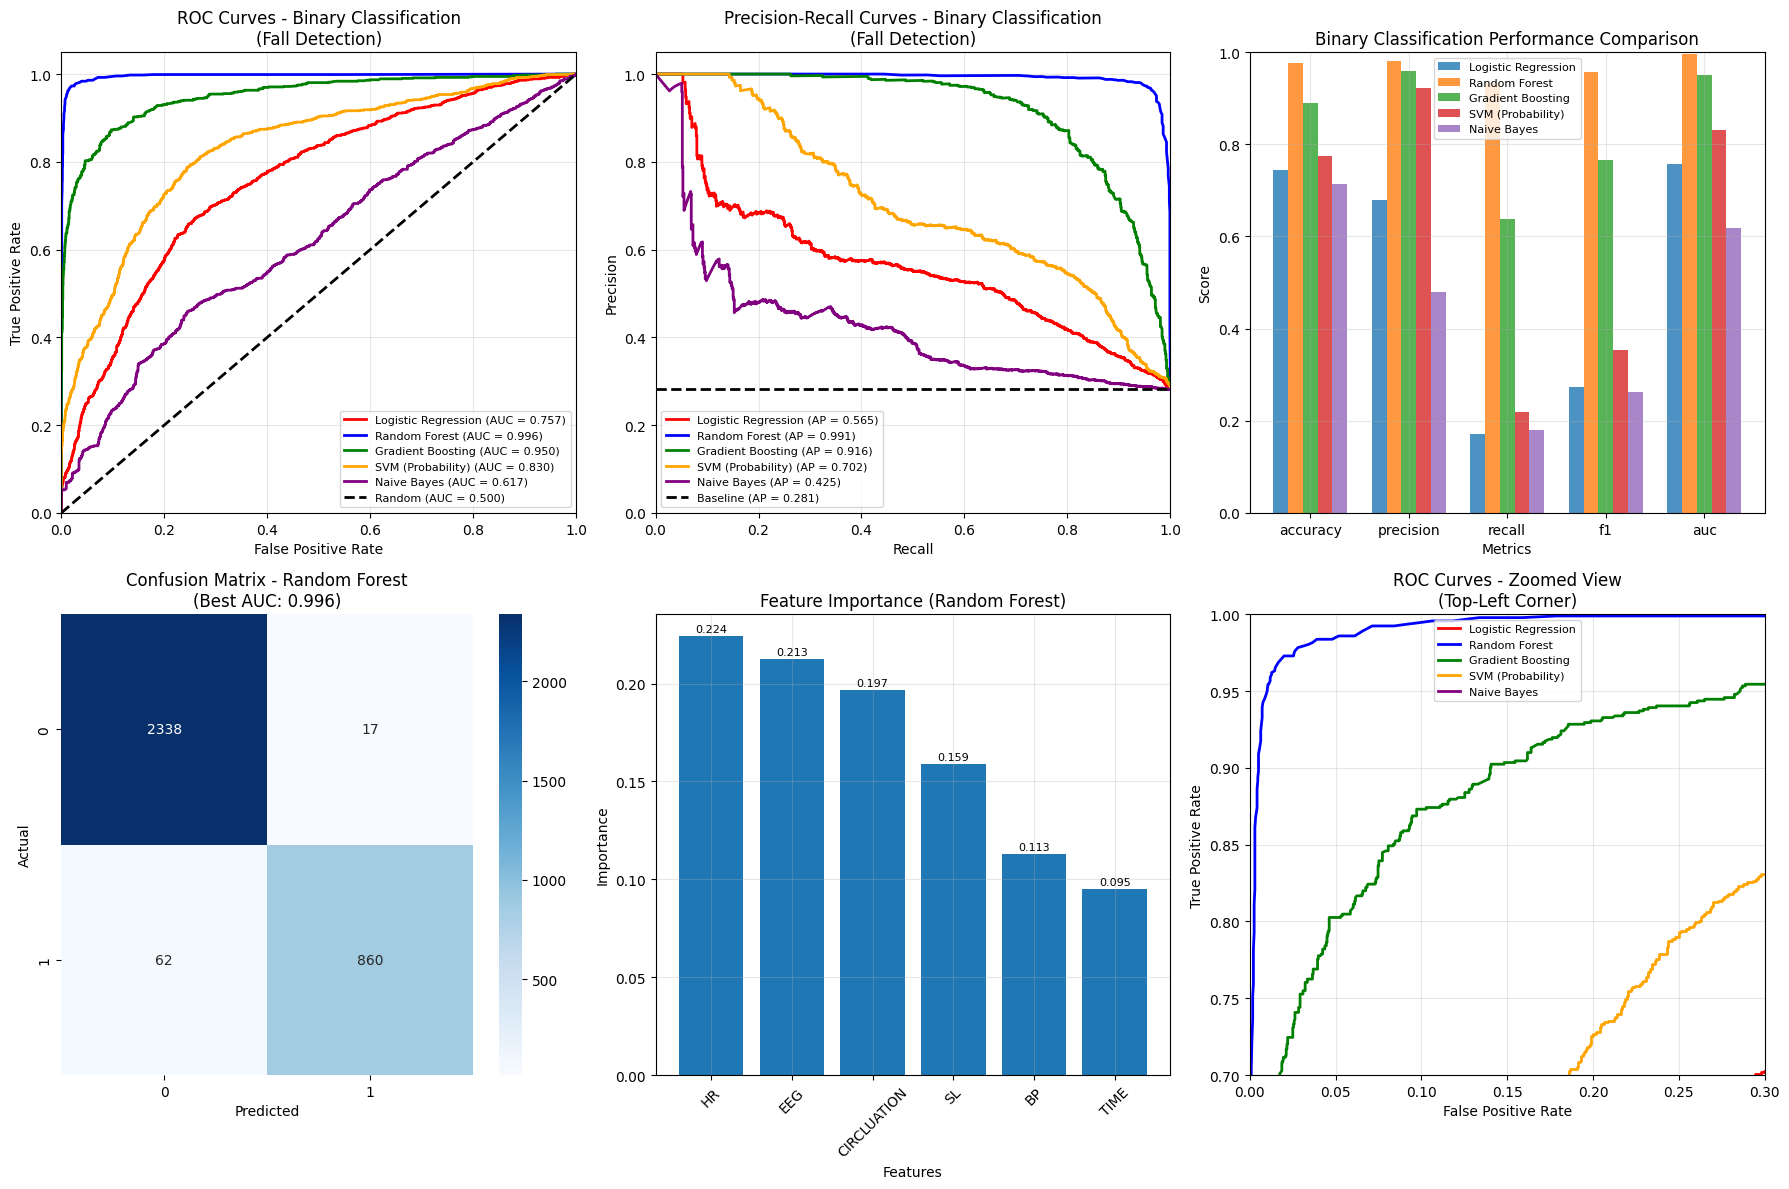


Binary Classification Results (Fall Detection):
--------------------------------------------------
Logistic Regression:
  Accuracy: 0.7440
  Precision: 0.6797
  Recall: 0.1703
  F1: 0.2723
  Auc: 0.7574

Random Forest:
  Accuracy: 0.9759
  Precision: 0.9806
  Recall: 0.9328
  F1: 0.9561
  Auc: 0.9962

Gradient Boosting:
  Accuracy: 0.8904
  Precision: 0.9592
  Recall: 0.6377
  F1: 0.7661
  Auc: 0.9504

SVM (Probability):
  Accuracy: 0.7748
  Precision: 0.9220
  Recall: 0.2180
  F1: 0.3526
  Auc: 0.8304

Naive Bayes:
  Accuracy: 0.7144
  Precision: 0.4798
  Recall: 0.1800
  F1: 0.2618
  Auc: 0.6174



In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (roc_curve, auc, precision_recall_curve,
                           average_precision_score, classification_report,
                           confusion_matrix, accuracy_score, f1_score,
                           roc_auc_score, precision_score, recall_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

# Load and explore the dataset
df = pd.read_csv('D:/Work/Course_job/data/falldetection.csv')

print("Fall Detection Dataset Overview:")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())

print(f"\nDataset statistics:")
print(df.describe())

# Check activity distribution
print(f"\nActivity distribution:")
activity_counts = df['ACTIVITY'].value_counts().sort_index()
print(activity_counts)
print(f"\nActivity percentages:")
for activity, count in activity_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Activity {activity}: {count:,} samples ({percentage:.1f}%)")

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Define features and target
feature_columns = ['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']
X = df[feature_columns]
y = df['ACTIVITY']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train_scaled.shape[0]}")
print(f"Test set size: {X_test_scaled.shape[0]}")

# For demonstration, let's create both binary and multiclass scenarios
# Assuming activity 0 represents 'fall' and others represent 'non-fall'
# You can adjust this based on your domain knowledge
y_binary = (y == 0).astype(int)  # 1 for fall (activity 0), 0 for non-fall
y_train_binary = (y_train == 0).astype(int)
y_test_binary = (y_test == 0).astype(int)

print(f"Binary class distribution:")
print(f"Fall (1): {np.sum(y_binary):,} samples ({np.mean(y_binary)*100:.1f}%)")
print(f"Non-fall (0): {np.sum(1-y_binary):,} samples ({np.mean(1-y_binary)*100:.1f}%)")

# Define classifiers for binary classification
binary_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM (Probability)': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train binary classifiers and collect predictions
binary_results = {}
binary_probabilities = {}

print(f"\nTraining binary classifiers...")
for name, clf in binary_classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train_scaled, y_train_binary)

    # Get probability predictions
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class
    else:
        y_prob = clf.decision_function(X_test_scaled)

    binary_probabilities[name] = y_prob

    # Calculate metrics
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_binary, y_pred)
    precision = precision_score(y_test_binary, y_pred)
    recall = recall_score(y_test_binary, y_pred)
    f1 = f1_score(y_test_binary, y_pred)
    auc_score = roc_auc_score(y_test_binary, y_prob)

    binary_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc_score
    }

    print(f"  {name} - AUC: {auc_score:.4f}, F1: {f1:.4f}")

# Create comprehensive binary classification visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. ROC Curves for Binary Classification
ax1 = axes[0, 0]
colors = ['red', 'blue', 'green', 'orange', 'purple']
for (name, y_prob), color in zip(binary_probabilities.items(), colors):
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color=color, lw=2,
            label=f'{name} (AUC = {roc_auc:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves - Binary Classification\n(Fall Detection)')
ax1.legend(loc="lower right", fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Precision-Recall Curves for Binary Classification
ax2 = axes[0, 1]
baseline_precision = np.mean(y_test_binary)

for (name, y_prob), color in zip(binary_probabilities.items(), colors):
    precision, recall, _ = precision_recall_curve(y_test_binary, y_prob)
    avg_precision = average_precision_score(y_test_binary, y_prob)
    ax2.plot(recall, precision, color=color, lw=2,
            label=f'{name} (AP = {avg_precision:.3f})')

ax2.axhline(y=baseline_precision, color='k', linestyle='--', lw=2,
           label=f'Baseline (AP = {baseline_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves - Binary Classification\n(Fall Detection)')
ax2.legend(loc="lower left", fontsize=8)
ax2.grid(True, alpha=0.3)

# 3. Performance Metrics Comparison
ax3 = axes[0, 2]
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
x = np.arange(len(metrics))
width = 0.15

for i, (name, results) in enumerate(binary_results.items()):
    values = [results[metric] for metric in metrics]
    ax3.bar(x + i*width, values, width, label=name, alpha=0.8)

ax3.set_xlabel('Metrics')
ax3.set_ylabel('Score')
ax3.set_title('Binary Classification Performance Comparison')
ax3.set_xticks(x + width * 2)
ax3.set_xticklabels(metrics)
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 1])

# 4. Confusion Matrix for Best Performing Model
best_model_name = max(binary_results.keys(), key=lambda x: binary_results[x]['auc'])
best_model = binary_classifiers[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test_binary, y_pred_best)

ax4 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax4)
ax4.set_xlabel('Predicted')
ax4.set_ylabel('Actual')
ax4.set_title(f'Confusion Matrix - {best_model_name}\n(Best AUC: {binary_results[best_model_name]["auc"]:.3f})')

# 5. Feature Importance (using Random Forest)
ax5 = axes[1, 1]
rf_model = binary_classifiers['Random Forest']
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

bars = ax5.bar(range(len(feature_importance)), feature_importance[sorted_idx])
ax5.set_xlabel('Features')
ax5.set_ylabel('Importance')
ax5.set_title('Feature Importance (Random Forest)')
ax5.set_xticks(range(len(feature_importance)))
ax5.set_xticklabels([feature_columns[i] for i in sorted_idx], rotation=45)
ax5.grid(True, alpha=0.3)

# Add value labels on bars
for bar, importance in zip(bars, feature_importance[sorted_idx]):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{importance:.3f}', ha='center', va='bottom', fontsize=8)

# 6. ROC Curve Zoom (focusing on top-left corner)
ax6 = axes[1, 2]
for (name, y_prob), color in zip(binary_probabilities.items(), colors):
    fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
    ax6.plot(fpr, tpr, color=color, lw=2, label=f'{name}')

ax6.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5)
ax6.set_xlim([0.0, 0.3])  # Zoom in on the important region
ax6.set_ylim([0.7, 1.0])
ax6.set_xlabel('False Positive Rate')
ax6.set_ylabel('True Positive Rate')
ax6.set_title('ROC Curves - Zoomed View\n(Top-Left Corner)')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



print("\nBinary Classification Results (Fall Detection):")
print("-" * 50)
for name, results in binary_results.items():
    print(f"{name}:")
    for metric, value in results.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    print()





## Multiclass Classification Scenario

Number of classes: 6
Classes: [0 1 2 3 4 5]


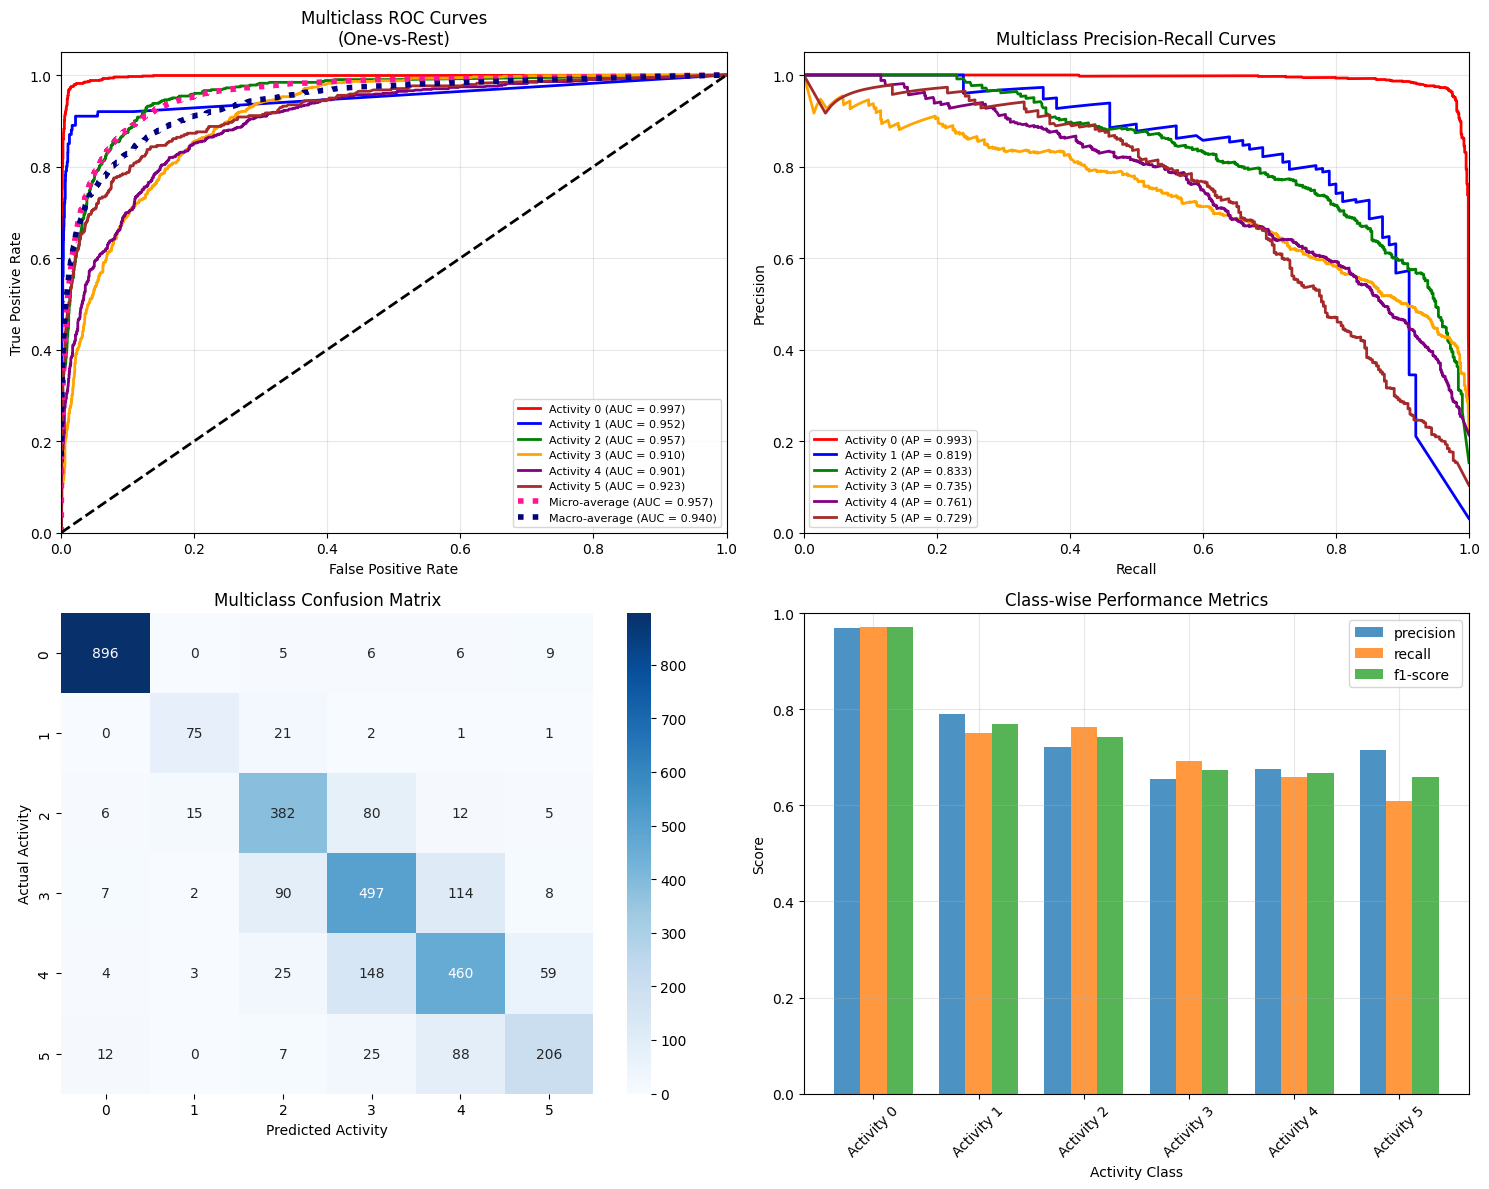

Multiclass Classification Results:
--------------------------------------------------
Overall Accuracy: 0.7678
Macro-average AUC: 0.9400
Micro-average AUC: 0.9571

Per-class AUC scores:
  Activity 0: 0.9967
  Activity 1: 0.9522
  Activity 2: 0.9567
  Activity 3: 0.9097
  Activity 4: 0.9008
  Activity 5: 0.9234

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       922
           1       0.79      0.75      0.77       100
           2       0.72      0.76      0.74       500
           3       0.66      0.69      0.67       718
           4       0.68      0.66      0.67       699
           5       0.72      0.61      0.66       338

    accuracy                           0.77      3277
   macro avg       0.75      0.74      0.75      3277
weighted avg       0.77      0.77      0.77      3277


Feature Importance Analysis:
------------------------------
       Feature  Importance
4           HR    0.224192
2     

In [15]:
# Binarize the output for multiclass ROC curves
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

print(f"Number of classes: {n_classes}")
print(f"Classes: {np.unique(y)}")

# Train multiclass classifier
multiclass_clf = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42)
)
multiclass_clf.fit(X_train_scaled, y_train)

# Get probability predictions for each class
y_score = multiclass_clf.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Create multiclass visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Multiclass ROC Curves
ax1 = axes[0, 0]
colors = cycle(['red', 'blue', 'green', 'orange', 'purple', 'brown'])
for i, color in zip(range(n_classes), colors):
    ax1.plot(fpr[i], tpr[i], color=color, lw=2,
            label=f'Activity {np.unique(y)[i]} (AUC = {roc_auc[i]:.3f})')

ax1.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})',
         color='deeppink', linestyle=':', linewidth=4)

ax1.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average (AUC = {roc_auc["macro"]:.3f})',
         color='navy', linestyle=':', linewidth=4)

ax1.plot([0, 1], [0, 1], 'k--', lw=2)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Multiclass ROC Curves\n(One-vs-Rest)')
ax1.legend(loc="lower right", fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Precision-Recall Curves for Multiclass
ax2 = axes[0, 1]
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

colors = cycle(['red', 'blue', 'green', 'orange', 'purple', 'brown'])
for i, color in zip(range(n_classes), colors):
    ax2.plot(recall[i], precision[i], color=color, lw=2,
            label=f'Activity {np.unique(y)[i]} (AP = {average_precision[i]:.3f})')

ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Multiclass Precision-Recall Curves')
ax2.legend(loc="lower left", fontsize=8)
ax2.grid(True, alpha=0.3)

# 3. Multiclass Confusion Matrix
ax3 = axes[1, 0]
y_pred_multiclass = multiclass_clf.predict(X_test_scaled)
cm_multiclass = confusion_matrix(y_test, y_pred_multiclass)

sns.heatmap(cm_multiclass, annot=True, fmt='d', cmap='Blues', ax=ax3)
ax3.set_xlabel('Predicted Activity')
ax3.set_ylabel('Actual Activity')
ax3.set_title('Multiclass Confusion Matrix')

# 4. Class-wise Performance Metrics
ax4 = axes[1, 1]
class_report = classification_report(y_test, y_pred_multiclass, output_dict=True)

# Extract metrics for each class
classes = [str(i) for i in np.unique(y)]
metrics = ['precision', 'recall', 'f1-score']
class_metrics = np.array([[class_report[cls][metric] for metric in metrics] for cls in classes])

x = np.arange(len(classes))
width = 0.25

for i, metric in enumerate(metrics):
    ax4.bar(x + i*width, class_metrics[:, i], width, label=metric, alpha=0.8)

ax4.set_xlabel('Activity Class')
ax4.set_ylabel('Score')
ax4.set_title('Class-wise Performance Metrics')
ax4.set_xticks(x + width)
ax4.set_xticklabels([f'Activity {cls}' for cls in classes], rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("Multiclass Classification Results:")
print("-" * 50)
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred_multiclass):.4f}")
print(f"Macro-average AUC: {roc_auc['macro']:.4f}")
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")

print(f"\nPer-class AUC scores:")
for i, class_label in enumerate(np.unique(y)):
    print(f"  Activity {class_label}: {roc_auc[i]:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_multiclass))

# Feature importance analysis
print(f"\nFeature Importance Analysis:")
print("-" * 30)
rf_importance = binary_classifiers['Random Forest'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_importance
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

## Explanation of the ROC and PR Curves Example
- ROC curves show classifier performance across all thresholds
- PR curves are more informative for imbalanced datasets
- AUC values provide single-number performance summary
- Multiclass extension shows per-class discrimination ability
- Feature importance reveals most predictive sensors/measurements

## Summary
ROC and PR curves provide valuable insights into the strengths and weaknesses of classification models, helping practitioners choose the best model and threshold for their specific application.

## Review and Self-Assessment
- What does the area under the ROC curve represent?
- When should you use a PR curve instead of an ROC curve?
- How do you interpret a point on the ROC or PR curve?

---